In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('/Users/abhishekwaghchaure/Desktop/PW_Skills _End2End_Projects/Diamond_Price_Prediction/notebooks/data/gemstone.csv')

In [20]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [21]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [22]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## no null values in the dataset

In [23]:
df.duplicated().sum()

0

## no duplicate values in the dataset


In [24]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [25]:
categorical_column = df.columns[df.dtypes == 'object']
numerical_column = df.columns[df.dtypes != 'object']
print(categorical_column)
print(numerical_column)

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [26]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [27]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [28]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

/n


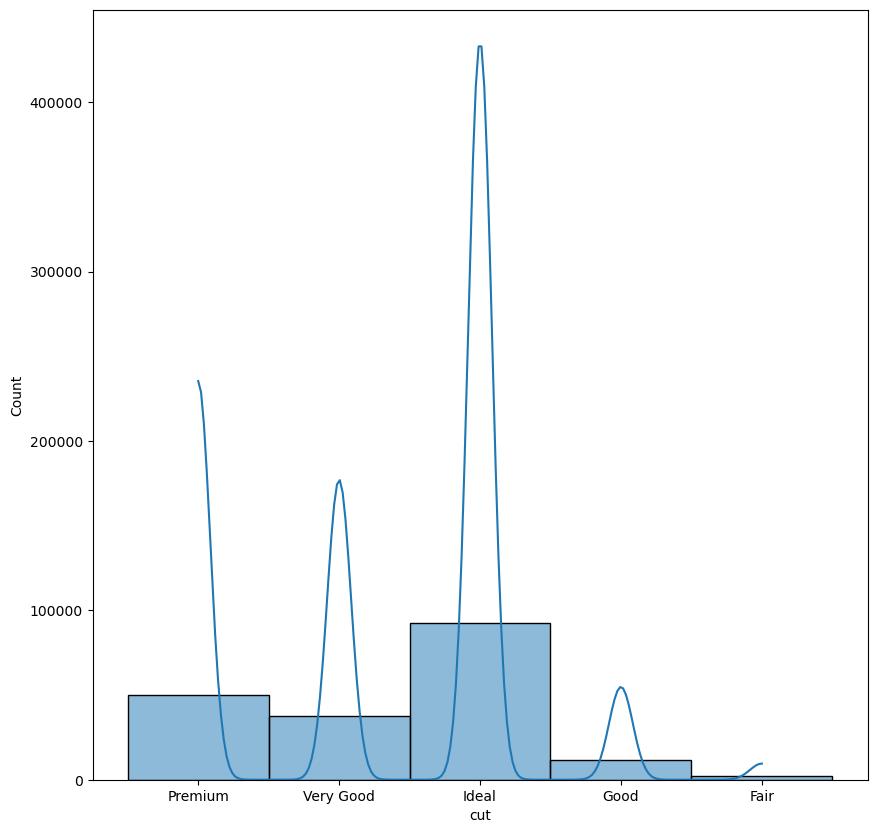

/n


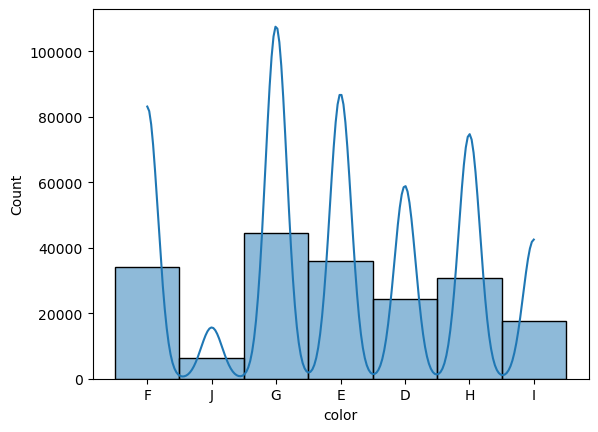

/n


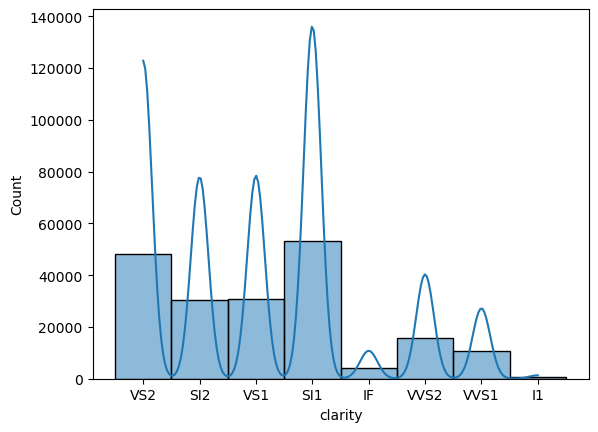

In [30]:
plt.figure(figsize=(10,10))
x = 0
for i in categorical_column:
    sns.histplot(data = df, x = i, kde= True)
    print('/n')
    plt.show()

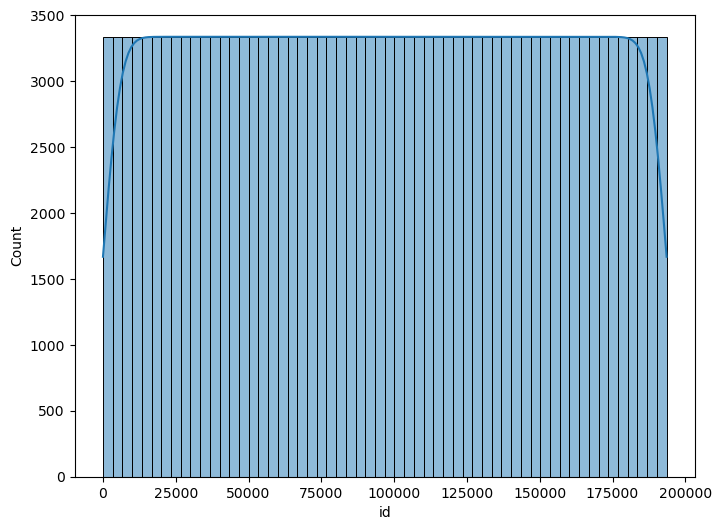

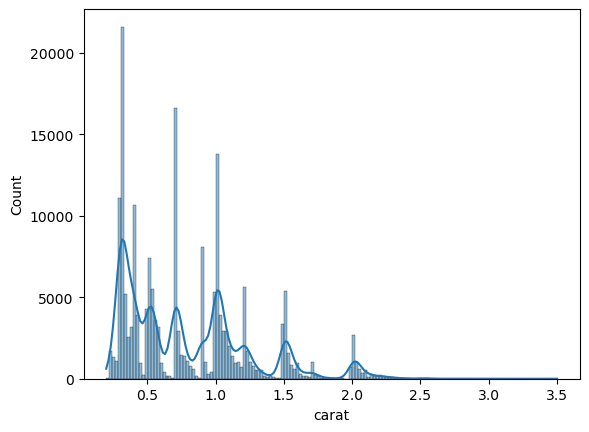

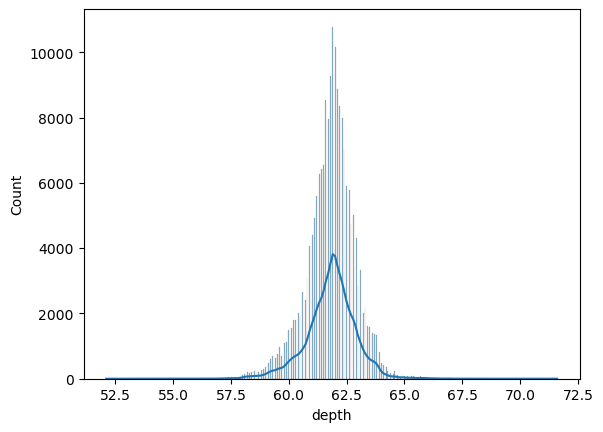

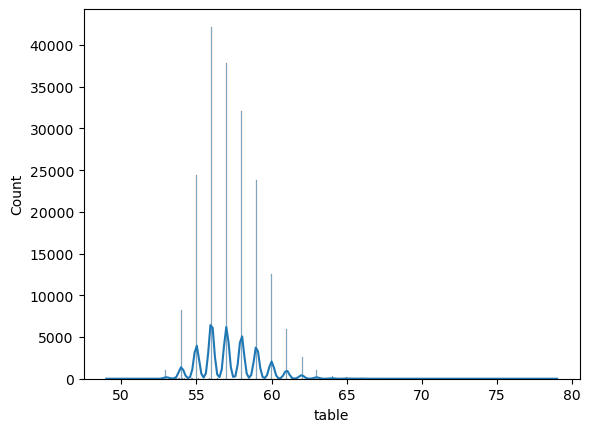

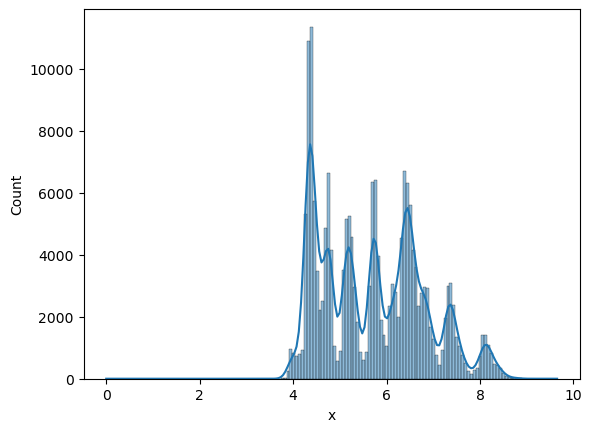

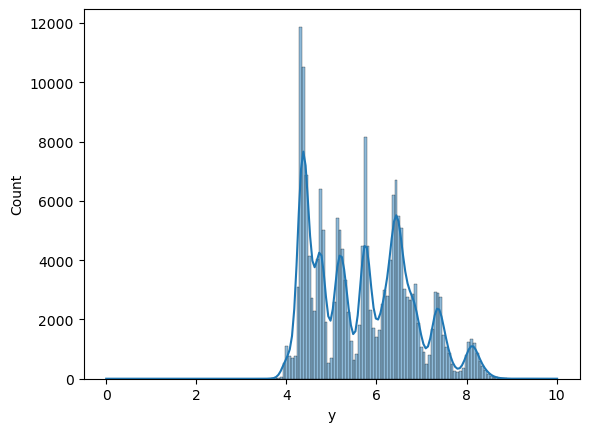

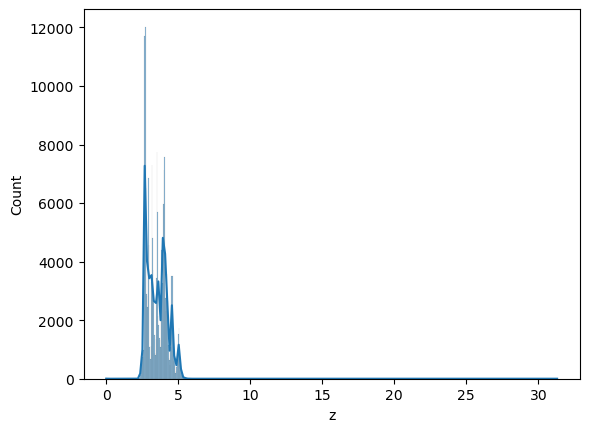

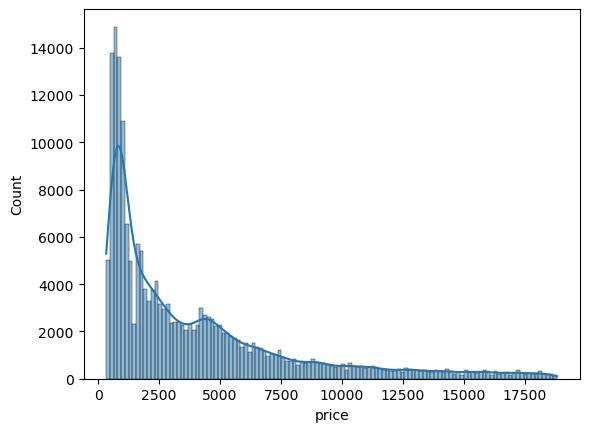

In [31]:
plt.figure(figsize=(8,6))
x = 0
for i in numerical_column:
    sns.histplot(data = df, kde = True, x = i)
    plt.show()

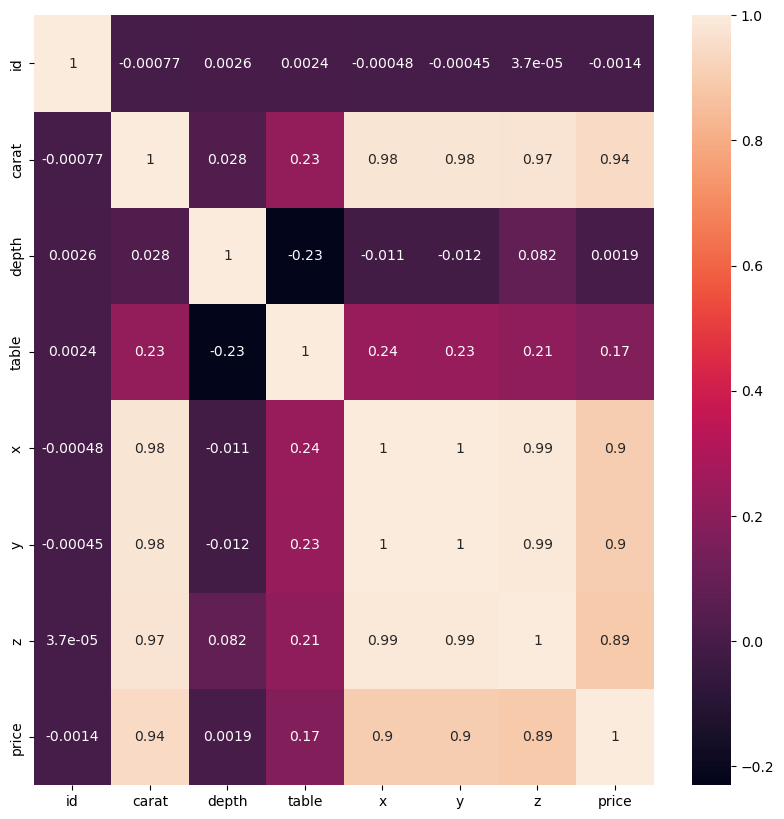

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical_column].corr(),annot=True)
plt.show()

In [34]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [33]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

## ordinal encoding with mapping

In [35]:
cut_map = {'Fair' : 1 , 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}

In [45]:
df['cut'] = df['cut'].map(cut_map)

In [40]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [41]:
clarity_map = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [44]:
df['clarity'] = df['clarity'].map(clarity_map)

In [43]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [46]:
color_map = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}

In [47]:
df['color'] = df['color'].map(color_map)

In [48]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
